In [2]:
import os
import sys
from astropy import units
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

tab = Table.read('/home/adina/Downloads/rcParams.txt', format='csv')

for key, val in zip(tab['name'], tab['value']):
    plt.rcParams[key] = val

dat1 = np.load('/home/adina/.eleanor/ffis/s0092/avg_2-3.npy')
time1 = dat1[:,0] - 2457000

dat2 = np.load('/home/adina/.eleanor/ffis/s0092/avg_1-2.npy')
time2 = dat2[:,0] - 2457000

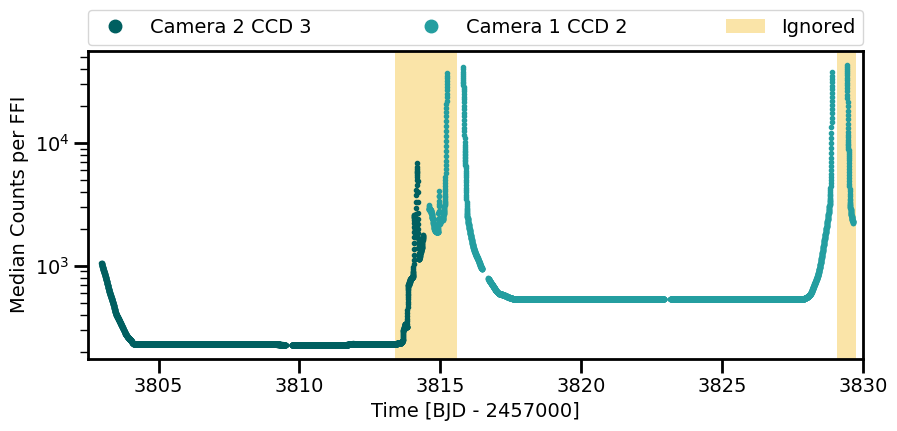

In [8]:
fig, ax = plt.subplots(figsize=(10,4))
fig.set_facecolor('w')

dia_ignored = '#fd5901'
ignored = '#f6cb52'
lw = 0
alpha = 0.5

plt.semilogy(time1, dat1[:,1], '.', label='Camera 2 CCD 3', color='#005f60')
plt.axvspan(time1[0]+10.4, time1[-1]+0.1, alpha=alpha, lw=lw, color=ignored)
#plt.axvspan(time1[0]-0.1, time1[0]+1.4, alpha=alpha, lw=lw, color=dia_ignored)


plt.semilogy(time2, dat2[:,1], '.', label='Camera 1 CCD 2', color='#249ea0')
plt.axvspan(time2[0]+14.5, time2[-1]+0.1, alpha=alpha, lw=lw, color=ignored)
plt.axvspan(time2[0]-0.1, time2[0]+1, alpha=alpha, lw=lw, color=ignored, label='Ignored')
#plt.axvspan(time2[0]+1.0, time2[0]+2.7, alpha=alpha, lw=lw, color=dia_ignored)
#plt.axvspan(time2[0]+13.3, time2[0]+14.5, alpha=alpha, lw=lw, color=dia_ignored, label='Ignored in Difference Imaging')





plt.ylabel('Median Counts per FFI')
plt.xlabel('Time [BJD - 2457000]')
plt.legend(markerscale=3, ncol=3, bbox_to_anchor=(0,1.02,1,0.102), loc=3, mode="expand", borderaxespad=0)

plt.xlim(3802.5, 3830)
ax.set_rasterized(True)

plt.savefig('ffi_cutoffs.pdf', bbox_inches='tight', dpi=300)